# PRACTICE PROJECT 7
BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.
PROBLEM STATEMENT
Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Problem Statement
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

You are provided with following 2 files:

1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.

2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.

 

Dataset Attributes
Here is the description of all the variables :

Variable: Definition

ID: Unique client ID

age: Age of the client

job: Type of job

marital: Marital status of the client

education: Education level

default: Credit in default.

housing: Housing loan

loan: Personal loan

contact: Type of communication

month: Contact month

day_of_week: Day of week of contact

duration: Contact duration

campaign: number of contacts performed during this campaign to the client

pdays: number of days that passed by after the client was last contacted

previous: number of contacts performed before this campaign

poutcome: outcome of the previous marketing campaign

Output variable (desired target):

Subscribed (target): has the client subscribed a term deposit? (YES/NO)


# IMPORTING THE REQUIRED LIBRARIES

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import power_transform
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
from sklearn.metrics import roc_curve
from scipy.stats import zscore
import joblib
import warnings
warnings.simplefilter("ignore")

In [89]:
#LOADING THE TRAINING DATASET FROM GITHUB REPOSITORY USING RAW METHOD
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv")
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [90]:
#LOADING THE TEST DATASET FROM GITHUB REPOSITORY USING RAW METHOD
df1=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv")
df1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [91]:
df.sample(20)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
6763,24674,34,self-employed,single,tertiary,no,876,yes,no,cellular,17,nov,145,2,-1,0,unknown,no
20392,39397,34,admin.,married,tertiary,no,10,no,no,cellular,22,may,81,1,-1,0,unknown,no
13841,28651,29,management,single,tertiary,no,475,no,no,cellular,29,jan,346,2,-1,0,unknown,no
11824,17071,38,admin.,married,secondary,no,689,yes,no,cellular,25,jul,270,1,-1,0,unknown,no
24981,42685,55,management,married,tertiary,no,7803,no,no,cellular,15,jan,441,1,-1,0,unknown,yes
2460,35954,45,management,divorced,tertiary,no,2237,yes,no,cellular,8,may,128,3,322,2,failure,no
31510,17319,32,services,married,secondary,no,-173,yes,no,cellular,28,jul,300,2,-1,0,unknown,no
17027,5130,34,technician,divorced,primary,no,3744,yes,no,unknown,21,may,489,2,-1,0,unknown,no
28346,19260,49,blue-collar,married,secondary,no,-42,no,no,cellular,6,aug,585,4,-1,0,unknown,no
22593,18932,60,blue-collar,married,primary,no,1670,no,no,cellular,4,aug,115,1,-1,0,unknown,no


In [92]:
df1.sample(20)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
12104,12201,52,technician,divorced,secondary,no,2816,no,no,unknown,20,jun,492,3,-1,0,unknown
10628,30708,27,blue-collar,single,primary,no,540,no,no,cellular,6,feb,115,1,-1,0,unknown
4872,34201,56,management,married,tertiary,no,2333,no,no,cellular,4,may,244,1,-1,0,unknown
1981,30208,41,blue-collar,married,primary,no,438,no,no,cellular,5,feb,46,1,-1,0,unknown
9960,24789,53,entrepreneur,married,unknown,no,2496,no,yes,cellular,18,nov,94,1,-1,0,unknown
7371,9118,54,entrepreneur,married,tertiary,no,11464,no,no,unknown,5,jun,222,1,-1,0,unknown
2571,15382,39,admin.,married,secondary,no,-234,no,yes,cellular,18,jul,75,1,-1,0,unknown
8905,44237,57,retired,married,secondary,no,3738,yes,no,cellular,20,jul,178,2,92,8,failure
8013,15281,34,management,single,tertiary,no,21,yes,no,cellular,18,jul,74,5,-1,0,unknown
655,28816,36,services,married,secondary,no,238,no,no,cellular,30,jan,424,1,-1,0,unknown


# EDA

# checking for null values in training dataset

In [93]:
df.isnull().sum() 

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

 No null values present in the training dataset.

# Checking for null values in testing dataset

In [94]:
df1.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

No null values present in the testing dataset.

# CHECKING DTYPES OF OBJECTS IN TRAINING DATASET

In [95]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

# CHECKING DTYPES OF OBJECTS PRESENT IN THE TESTING DATASET

In [96]:
df1.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

# Checking the shape of training dataset and testing dataset

In [97]:
print("The shape of training dataset is:-",df.shape, "and the shape of testing dataset is:-", df1.shape)

The shape of training dataset is:- (31647, 18) and the shape of testing dataset is:- (13564, 17)


# DATA VISUALIZATION

<AxesSubplot:xlabel='ID', ylabel='count'>

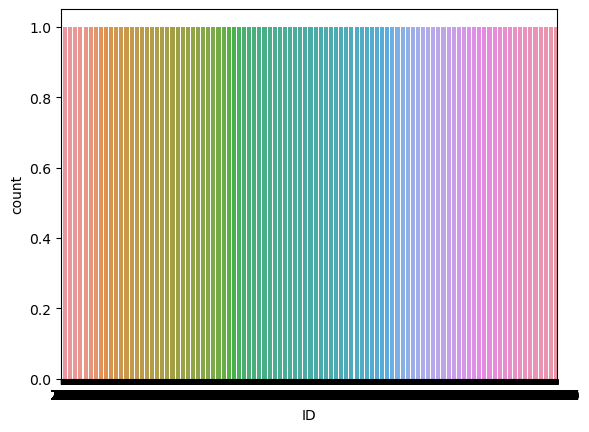

In [15]:
sns.countplot(df['ID'])

<AxesSubplot:xlabel='age', ylabel='job'>

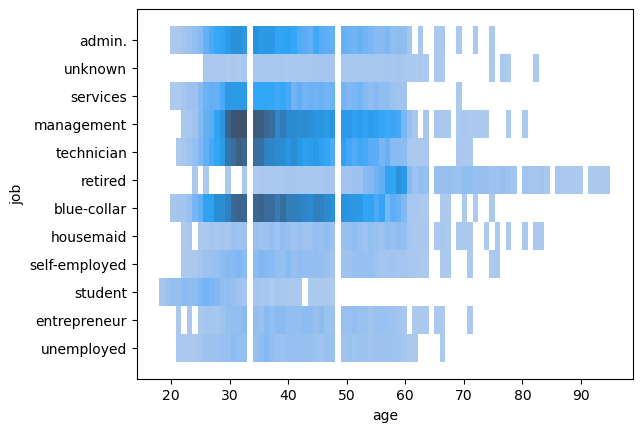

In [98]:
sns.histplot(data=df,x='age',y='job')

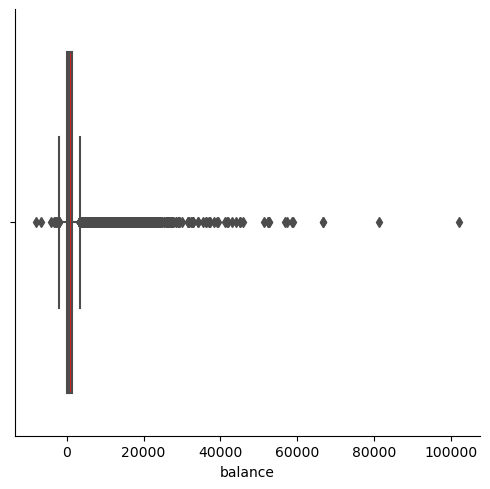

In [99]:
sns.catplot(data=df,x='balance',kind='box',color='red')

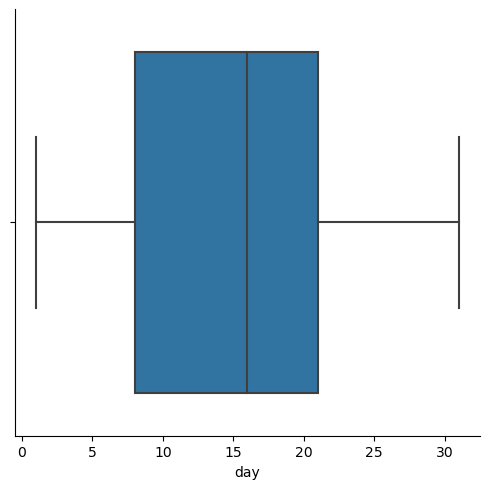

In [100]:
sns.catplot(data=df,x='day',kind='box')

<AxesSubplot:xlabel='duration', ylabel='Count'>

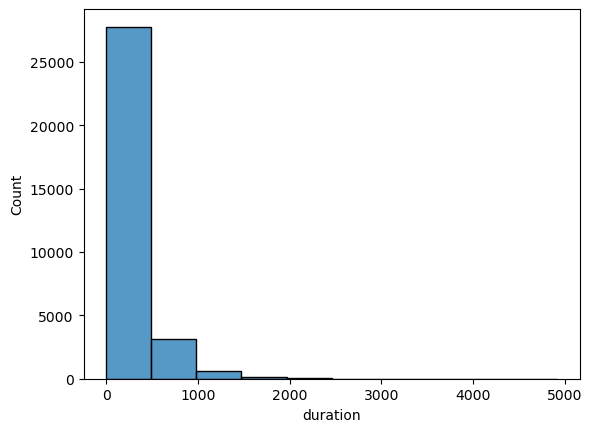

In [101]:
sns.histplot(data=df,x='duration',bins=10)

<AxesSubplot:xlabel='campaign', ylabel='pdays'>

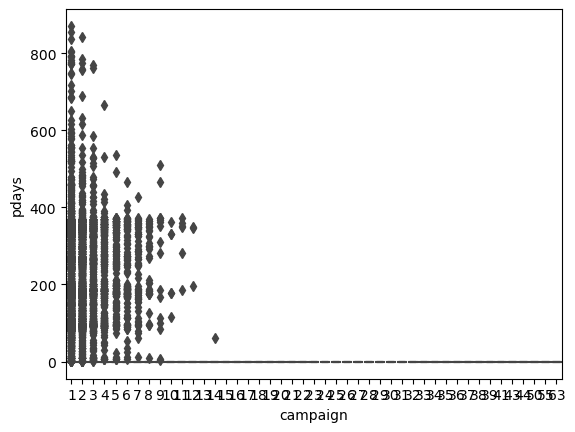

In [102]:
sns.boxplot(data=df,x='campaign',y='pdays')

# MERGING THE TRAINING AND TESTING DATASETS

In [103]:
df2=pd.concat([df,df1],ignore_index=True,sort=False)
df2

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown,NaN
45207,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown,NaN
45208,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown,NaN
45209,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,NaN


In [104]:
df2.shape

(45211, 18)

There are 45211 rows and 18 columns present after merging training and testing datasets.

In [105]:
pd.set_option('display.max_columns',None)

In [106]:
df2['subscribed']

0         no
1         no
2         no
3        yes
4         no
        ... 
45206    NaN
45207    NaN
45208    NaN
45209    NaN
45210    NaN
Name: subscribed, Length: 45211, dtype: object

In [107]:
df2['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [108]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          45211 non-null  int64 
 1   age         45211 non-null  int64 
 2   job         45211 non-null  object
 3   marital     45211 non-null  object
 4   education   45211 non-null  object
 5   default     45211 non-null  object
 6   balance     45211 non-null  int64 
 7   housing     45211 non-null  object
 8   loan        45211 non-null  object
 9   contact     45211 non-null  object
 10  day         45211 non-null  int64 
 11  month       45211 non-null  object
 12  duration    45211 non-null  int64 
 13  campaign    45211 non-null  int64 
 14  pdays       45211 non-null  int64 
 15  previous    45211 non-null  int64 
 16  poutcome    45211 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In the merged dataset 8 objects are having int64 as dtype and 10 objects are having Object as dtype.

In [109]:
df2.isnull().sum()     #checking for null values in merged dataset.

ID                0
age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
subscribed    13564
dtype: int64

In [110]:
df2.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [111]:
df2['ID'].duplicated().sum()

0

In [112]:
df2['age'].duplicated().sum()

45134

In [113]:
df2['job'].duplicated().sum()

45199

In [114]:
df2['marital'].duplicated().sum()

45208

In [115]:
df2['education'].duplicated().sum()

45207

In [116]:
df2['default'].duplicated().sum()

45209

In [117]:
df2['balance'].duplicated().sum()

38043

In [118]:
df2['housing'].duplicated().sum()

45209

In [119]:
df2['loan'].duplicated().sum()

45209

In [120]:
df2['contact'].duplicated().sum()

45208

In [121]:
df2['day'].duplicated().sum()

45180

In [122]:
df2['month'].duplicated().sum()

45199

In [123]:
df2['duration'].duplicated().sum()

43638

In [124]:
df2['campaign'].duplicated().sum()

45163

In [125]:
df2['pdays'].duplicated().sum()

44652

In [126]:
df2['previous'].duplicated().sum()

45170

In [127]:
df2['poutcome'].duplicated().sum()

45207

In [128]:
df2['subscribed'].duplicated().sum()

45208

In [129]:
df2.drop_duplicates()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown,NaN
45207,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown,NaN
45208,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown,NaN
45209,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,NaN


In [130]:
df2.duplicated().sum()

0

In [131]:
df2.shape

(45211, 18)

In [132]:
df2.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [133]:
ordin=OrdinalEncoder()

In [134]:
for i in df2.columns:
    if df2[i].dtypes=='object':
        df2[i]=ordin.fit_transform(df2[i].values.reshape(-1,1))

In [135]:
df2.isnull().sum()

ID                0
age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
subscribed    13564
dtype: int64

In [136]:
df2['subscribed']=df2['subscribed'].fillna(np.mean(df2['subscribed']))
df2['subscribed']

0        0.000000
1        0.000000
2        0.000000
3        1.000000
4        0.000000
           ...   
45206    0.117389
45207    0.117389
45208    0.117389
45209    0.117389
45210    0.117389
Name: subscribed, Length: 45211, dtype: float64

In [137]:
df2['subscribed']=df2['subscribed'].astype(int)
df2['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: subscribed, Length: 45211, dtype: int32

In [138]:
df2['subscribed'].value_counts()

0    41496
1     3715
Name: subscribed, dtype: int64

<AxesSubplot:xlabel='subscribed'>

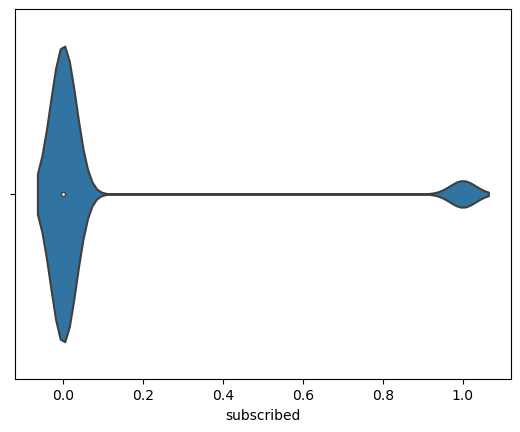

In [139]:
sns.violinplot(df2['subscribed'])

In [140]:
df2.describe()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.082170
std,13051.435847,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.274627
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,11303.500000,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,22606.000000,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,33908.500000,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,45211.000000,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [141]:
df2.drop(['balance','pdays'],axis=1,inplace=True)

In [142]:
df2.shape

(45211, 16)

In [143]:
df2.corr()

,ID,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed
ID,1.000000,0.014973,0.063002,0.081781,0.094658,-0.053098,-0.176143,-0.084240,-0.722366,-0.061465,-0.162055,0.013031,-0.102884,0.271098,-0.445365,0.242887
age,0.014973,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,0.001288,0.007367,0.020737
job,0.063002,-0.021868,1.000000,0.062045,0.166707,-0.006853,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.000911,0.011010,0.031299
marital,0.081781,-0.403240,0.062045,1.000000,0.108576,-0.007023,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.014973,-0.016850,0.037462
education,0.094658,-0.106807,0.166707,0.108576,1.000000,-0.010718,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.017570,-0.019361,0.054358
default,-0.053098,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.018329,0.034898,-0.015720
housing,-0.176143,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.037076,-0.099971,-0.115889
loan,-0.084240,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.011043,0.015458,-0.058019
contact,-0.722366,0.026221,-0.082063,-0.039201,-0.110928,0.015404,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.147811,0.272214,-0.121851
day,-0.061465,-0.009120,0.022856,-0.005261,0.022671,0.009424,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.051710,0.083460,-0.023283


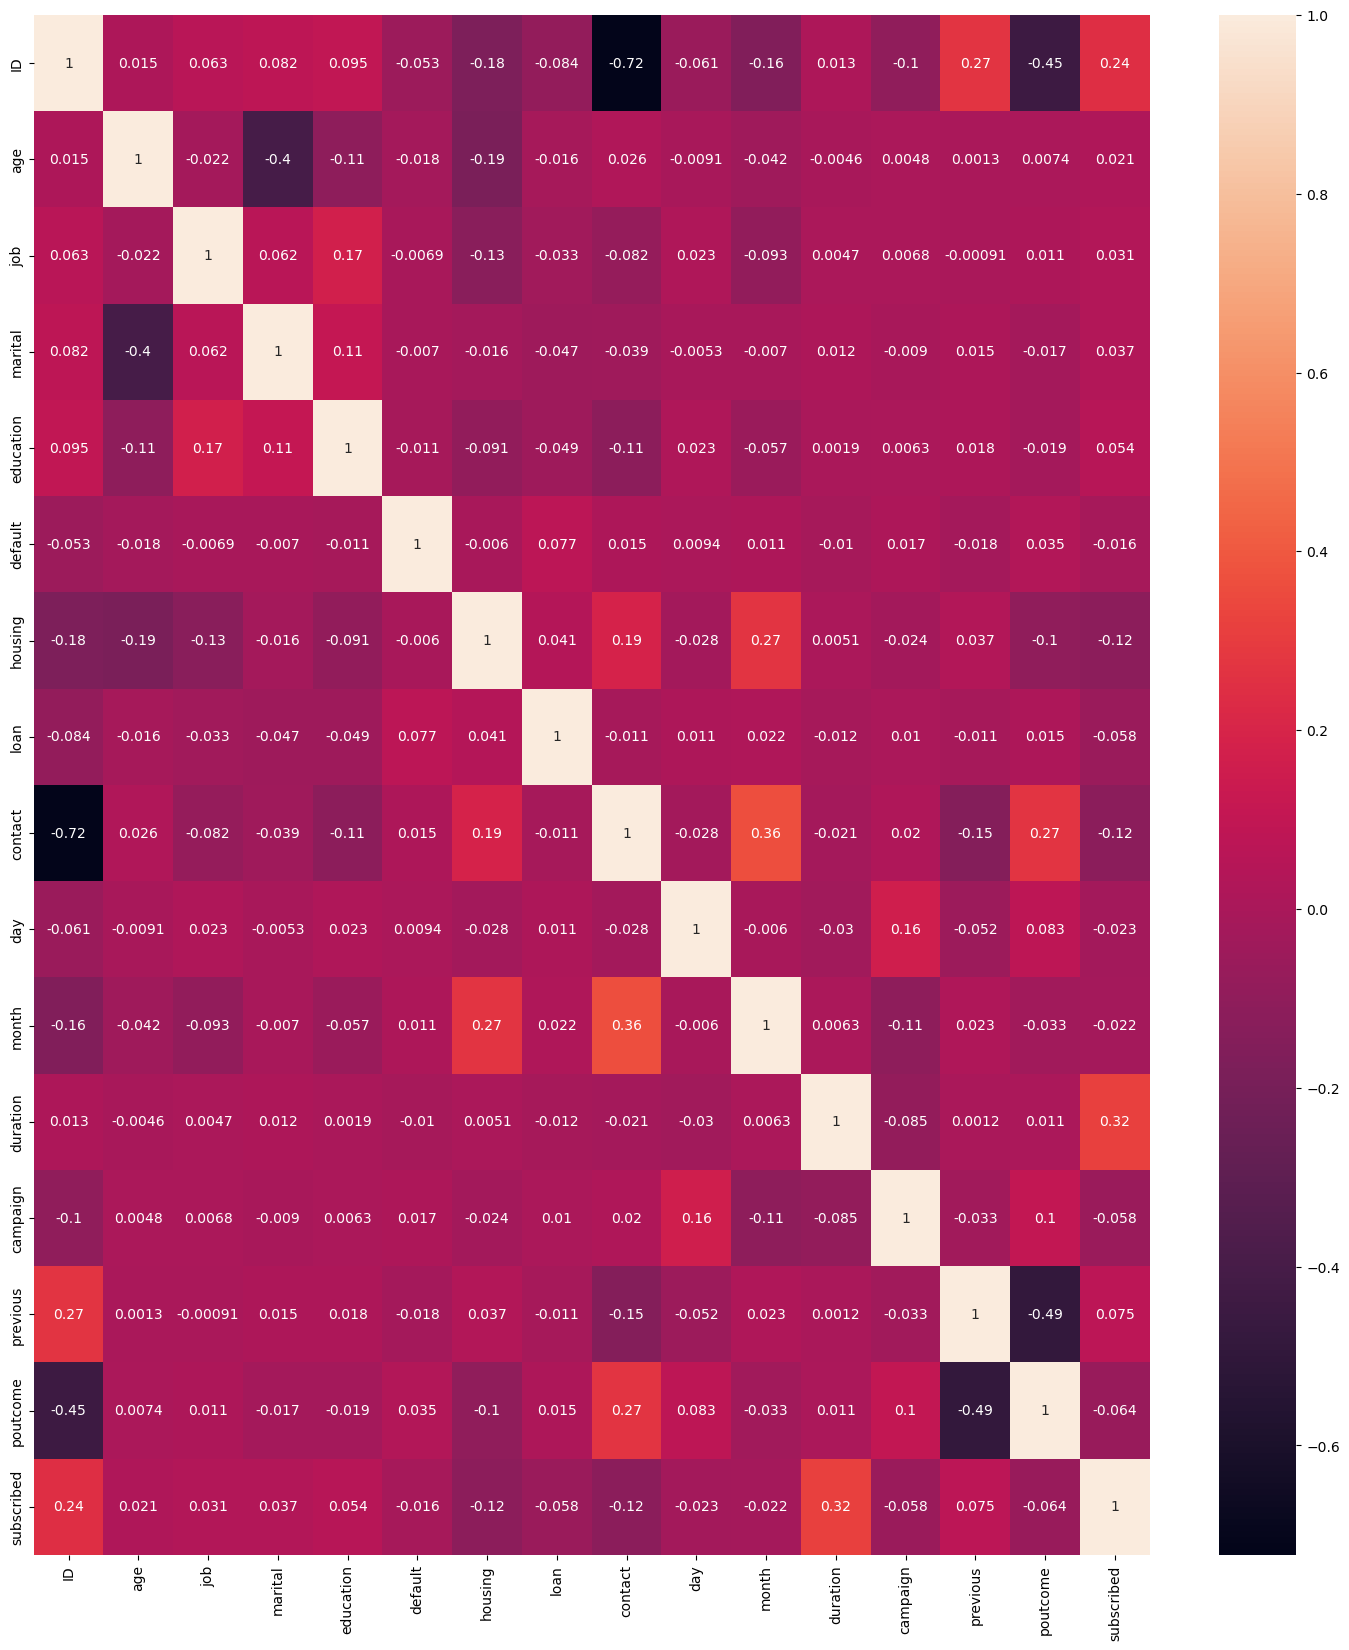

In [145]:
plt.figure(figsize=(18,20))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [146]:
df2.drop('ID',axis=1,inplace=True)
df2.shape

(45211, 15)

<AxesSubplot:>

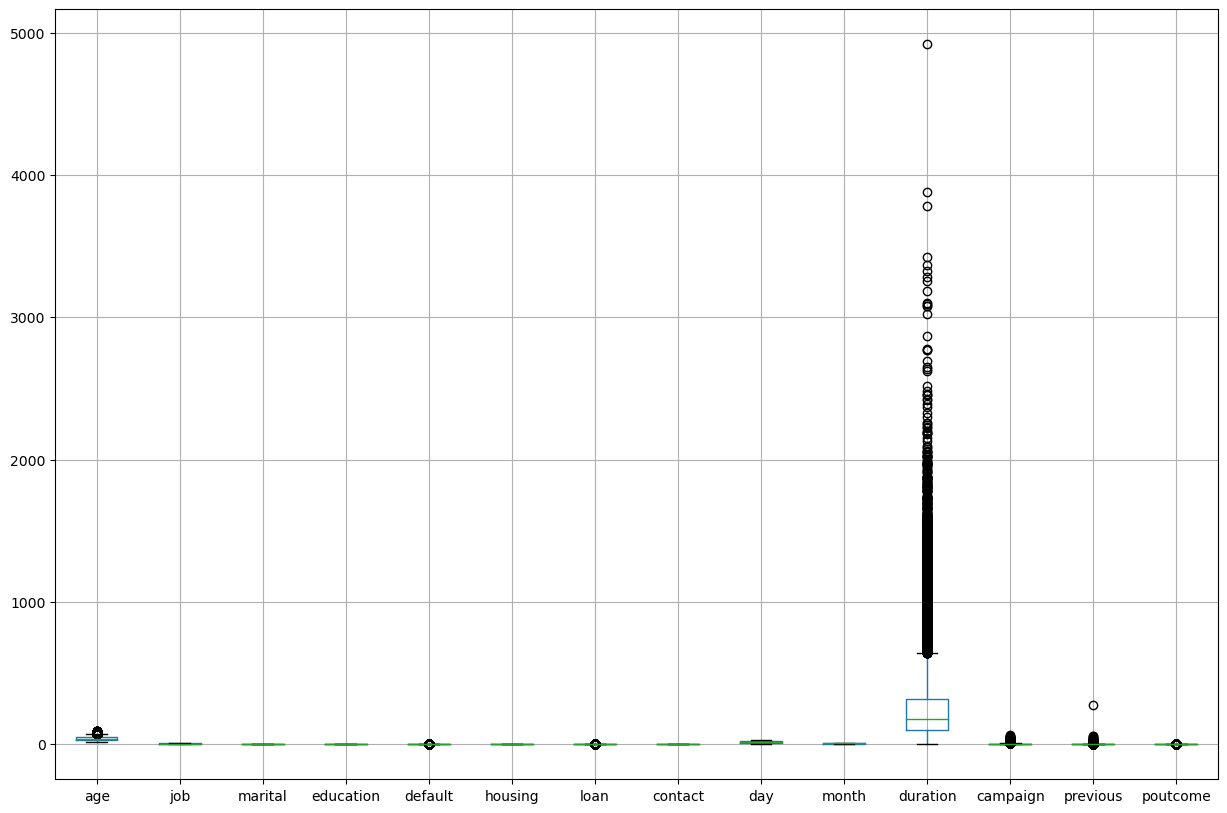

In [148]:
df2.iloc[:,0:-1].boxplot(figsize=(15,10))

# CHECKING FOR SKEWNESS

In [149]:
df2.skew()

age            0.684818
job            0.261755
marital       -0.102826
education      0.197275
default        7.245375
housing       -0.224766
loan           1.852617
contact        0.769381
day            0.093079
month         -0.480272
duration       3.144318
campaign       4.898650
previous      41.846454
poutcome      -1.973561
subscribed     3.043024
dtype: float64

In [150]:
x=df2.iloc[:,:-1]
y=df2['subscribed']

In [152]:
z=np.abs(zscore(x))

In [153]:
df3=x[(z<3).all(axis=1)]

In [154]:
df3.skew()

age          0.443729
job          0.263280
marital     -0.101435
education    0.194811
default      0.000000
housing     -0.241901
loan         1.880639
contact      0.760609
day          0.103577
month       -0.498578
duration     1.589116
campaign     2.089841
previous     3.232894
poutcome    -2.020910
dtype: float64

In [155]:
df3.drop('previous',axis=1,inplace=True)
df3.shape

(41717, 13)

In [157]:
newdf=power_transform(x)

In [158]:
DF=pd.DataFrame(data=newdf,columns=x.columns)
DF.head()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,1.343682,-1.611098,-0.286301,2.201328,-0.13549,-1.118674,-0.436803,1.058378,0.443836,1.191842,-1.433850,0.134537,-0.47250,0.469810
1,-0.964433,1.652351,-0.286301,-0.254415,-0.13549,-1.118674,-0.436803,-0.734953,0.552958,-0.219256,-0.746583,0.134537,-0.47250,0.469810
2,-1.535672,0.857139,-0.286301,-0.254415,-0.13549,0.893915,-0.436803,-0.734953,0.333023,-0.219256,0.289691,-1.108191,-0.47250,0.469810
3,1.409327,0.093094,-1.892104,1.029751,-0.13549,-1.118674,-0.436803,-0.734953,0.766540,0.123104,1.893855,-1.108191,2.16663,-1.581037
4,-0.964433,1.277591,-0.286301,-0.254415,-0.13549,0.893915,-0.436803,-0.734953,-1.515435,-0.877030,0.831618,-1.108191,-0.47250,0.469810


In [159]:
y.value_counts()

0    41496
1     3715
Name: subscribed, dtype: int64

<AxesSubplot:xlabel='subscribed', ylabel='count'>

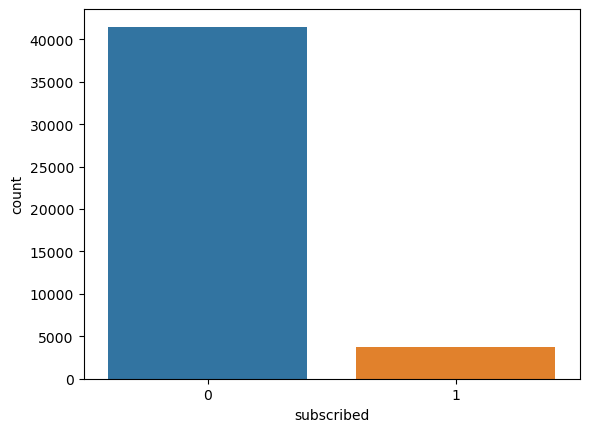

In [160]:
sns.countplot(y)

In [162]:
smt=SMOTE()
x_train,y_train=smt.fit_resample(DF,y)

In [163]:
y_train.value_counts()

0    41496
1    41496
Name: subscribed, dtype: int64

<AxesSubplot:xlabel='subscribed', ylabel='count'>

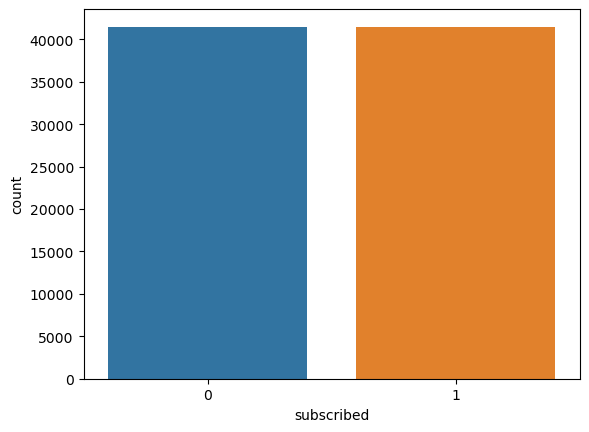

In [164]:
sns.countplot(y_train)

In [166]:
lr=LogisticRegression()

In [167]:
maxAcc=0
maxRS=0
for i in range(0,1000):
    x_train1,x_test,y_train1,y_test=train_test_split(x_train,y_train,test_size=0.20,random_state=i)
    lr.fit(x_train1,y_train1)
    predlr=lr.predict(x_test)
    score=accuracy_score(y_test,predlr)
    print('R2_score of LogisticRegression ' ,score, 'at random_state ' ,i)
    if score > maxAcc:
        maxAcc=score
        maxRS=i
    print('Mac acc score of lr ' ,maxAcc*100, 'at random_state ' ,maxRS)

R2_score of LogisticRegression  0.8090246400385566 at random_state  0
Mac acc score of lr  80.90246400385566 at random_state  0
R2_score of LogisticRegression  0.8055906982348334 at random_state  1
Mac acc score of lr  80.90246400385566 at random_state  0
R2_score of LogisticRegression  0.8117958913187542 at random_state  2
Mac acc score of lr  81.17958913187542 at random_state  2
R2_score of LogisticRegression  0.8030604253268269 at random_state  3
Mac acc score of lr  81.17958913187542 at random_state  2
R2_score of LogisticRegression  0.8100487981203687 at random_state  4
Mac acc score of lr  81.17958913187542 at random_state  2
R2_score of LogisticRegression  0.8076992589915055 at random_state  5
Mac acc score of lr  81.17958913187542 at random_state  2
R2_score of LogisticRegression  0.8045062955599734 at random_state  6
Mac acc score of lr  81.17958913187542 at random_state  2
R2_score of LogisticRegression  0.8064341225375022 at random_state  7
Mac acc score of lr  81.1795891318

In [168]:
x_train1,x_test,y_train1,y_test=train_test_split(x_train,y_train,test_size=0.20,random_state=517)
lr.fit(x_train1,y_train1)
predlr=lr.predict(x_test)
print((accuracy_score(y_test,predlr))*100)

81.60130128320984


# TESTING MORE MODELS FOR CHECKING ACCURACY

In [180]:
knc=KNeighborsClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
etc=ExtraTreesClassifier()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()

In [181]:
model=[knc,gbc,abc,etc,rfc,dtc]
for i in model:
    i.fit(x_train1,y_train1)
    pred=i.predict(x_test)
    print("Accuracy of the model",i,"is=",accuracy_score(y_test,pred)*100)

Accuracy of the model KNeighborsClassifier() is= 92.15012952587506
Accuracy of the model GradientBoostingClassifier() is= 91.04162901379601
Accuracy of the model AdaBoostClassifier() is= 86.98716790168083
Accuracy of the model ExtraTreesClassifier() is= 96.93957467317308
Accuracy of the model RandomForestClassifier() is= 95.95156334718959
Accuracy of the model DecisionTreeClassifier() is= 92.30676546779927


In [182]:
for i in range(2,10):
        models=[knc,gbc,abc,etc,rfc,dtc]
        for j in models:
            j.fit(x_train1,y_train1)
            predj=j.predict(x_test)
            score=accuracy_score(y_test,predj)
            cross=cross_val_score(j,x_train1,y_train1,cv=i)
            print(f'Accuracy_score of model ' ,j, 'is equal=' ,score*100)
            print(f'Cross validation of model ' ,j, 'is equal=' ,cross.mean(),'at cv=' ,i)
            print(f'Diff between accuracy_score and cross validation of model' ,j, 'is equal=' , score-(cross.mean()))

Accuracy_score of model  KNeighborsClassifier() is equal= 92.15012952587506
Cross validation of model  KNeighborsClassifier() is equal= 0.8900637099229038 at cv= 2
Diff between accuracy_score and cross validation of model KNeighborsClassifier() is equal= 0.03143758533584673
Accuracy_score of model  GradientBoostingClassifier() is equal= 91.04162901379601
Cross validation of model  GradientBoostingClassifier() is equal= 0.9023391133345456 at cv= 2
Diff between accuracy_score and cross validation of model GradientBoostingClassifier() is equal= 0.008077176803414465
Accuracy_score of model  AdaBoostClassifier() is equal= 86.98716790168083
Cross validation of model  AdaBoostClassifier() is equal= 0.8660099804283385 at cv= 2
Diff between accuracy_score and cross validation of model AdaBoostClassifier() is equal= 0.003861698588469742
Accuracy_score of model  ExtraTreesClassifier() is equal= 97.08416169648774
Cross validation of model  ExtraTreesClassifier() is equal= 0.9513502933952511 at cv=

The Random Forest Classifier and Extra Tree Classifier having very less difference between accuracy score and CVscore.

Need to choose the best model from 2 of them.

In [183]:
for i in range(2,10):
        models=[etc,rfc]
        for j in models:
            j.fit(x_train1,y_train1)
            predj=j.predict(x_test)
            score=accuracy_score(y_test,predj)
            cross=cross_val_score(j,x_train1,y_train1,cv=i)
            print(f'Accuracy_score of model ' ,j, 'is equal=' ,score*100)
            print(f'Cross validation of model ' ,j, 'is equal=' ,cross.mean(),'at cv=' ,i)
            print(f'Diff between accuracy_score and cross validation of model' ,j, 'is equal=' , score-(cross.mean()))

Accuracy_score of model  ExtraTreesClassifier() is equal= 96.99379480691607
Cross validation of model  ExtraTreesClassifier() is equal= 0.9508231495773007 at cv= 2
Diff between accuracy_score and cross validation of model ExtraTreesClassifier() is equal= 0.01911479849186004
Accuracy_score of model  RandomForestClassifier() is equal= 96.04795469606603
Cross validation of model  RandomForestClassifier() is equal= 0.9402648132524878 at cv= 2
Diff between accuracy_score and cross validation of model RandomForestClassifier() is equal= 0.020214733708172505
Accuracy_score of model  ExtraTreesClassifier() is equal= 97.02994156274475
Cross validation of model  ExtraTreesClassifier() is equal= 0.9589263928426189 at cv= 3
Diff between accuracy_score and cross validation of model ExtraTreesClassifier() is equal= 0.011373022784828546
Accuracy_score of model  RandomForestClassifier() is equal= 95.92746550997047
Cross validation of model  RandomForestClassifier() is equal= 0.9468468061392015 at cv= 3

# The Extra Tree Classifier is giving best results.

# HYPERTUNING

In [184]:
model=[etc]
for i in model:
    parameters={'n_estimators':[50,100,150,200],
            'criterion':['gini','squared_error'],
            'max_depth':[1,2,3],
            'max_features':['auto','sqrt','log2']}
    gscv=GridSearchCV(estimator=i,param_grid=parameters)
    gscv.fit(x_train1,y_train1)

In [185]:
print(gscv.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 150}


In [187]:
print(gscv.best_estimator_)

ExtraTreesClassifier(max_depth=3, max_features='sqrt', n_estimators=150)


# SAVING THE FINAL MODEL

In [191]:
joblib.dump(etc,"BANK TERM DEPOSIT PREDICTION.pkl")

['BANK TERM DEPOSIT PREDICTION.pkl']

In [192]:
Z=joblib.load("BANK TERM DEPOSIT PREDICTION.pkl")

# COMPARING THE PREDICTED AND ACTUAL RESULT

In [195]:
prediction=Z.predict(x_test)
prediction

array([1, 1, 0, ..., 0, 0, 0])

In [196]:
dd=pd.DataFrame([Z.predict(x_test)[:],y_test[:]],index=["predicted","Actual"])

In [197]:
dd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

# >>>>>>>DONE<<<<<<<<